In [1]:
import os
cur_dir = os.getcwd()
par_dir = os.path.abspath(os.path.join(cur_dir,os.pardir))
os.chdir(par_dir)

C:\Users\User\AppData\Local\Temp\ipykernel_17660\472901962.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(plot_data, labels=plot_columns, patch_artist=True)


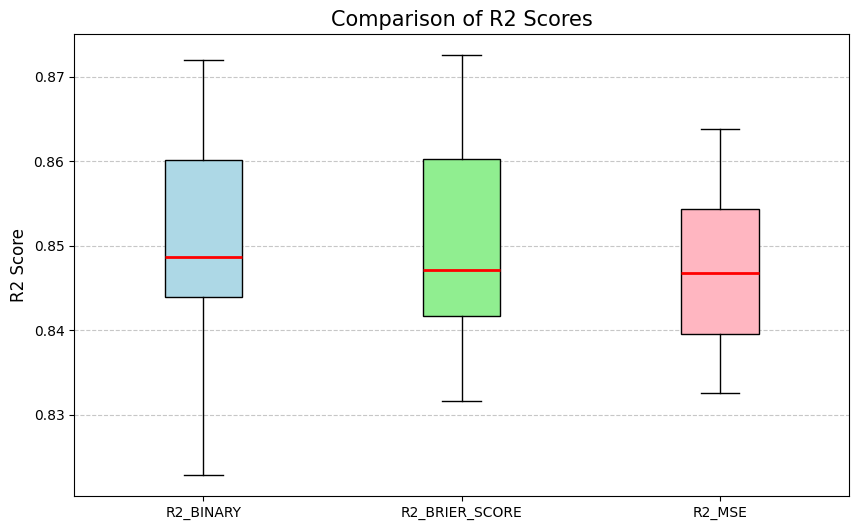

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# 1. JSON 파일 로드
with open('epoch_1/results_r2.json', 'r') as f:
    data = json.load(f)

# 2. 데이터프레임 변환
df = pd.DataFrame(data)

# 3. 시각화할 컬럼 선택 (random_state 제외)
plot_columns = ['R2_BINARY', 'R2_BRIER_SCORE', 'R2_MSE']
plot_data = [df[col] for col in plot_columns]

# 4. 박스플롯 생성
plt.figure(figsize=(10, 6))
box = plt.boxplot(plot_data, labels=plot_columns, patch_artist=True)

# 박스 색상 설정
colors = ['#add8e6', '#90ee90', '#ffb6c1']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# 중앙값 선 색상 변경
for median in box['medians']:
    median.set(color='red', linewidth=2)

# 그래프 꾸미기
plt.title('Comparison of R2 Scores', fontsize=15)
plt.ylabel('R2 Score', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# 5. 결과 확인 및 저장
plt.show()
# plt.savefig('r2_boxplot.png') # 이미지로 저장하고 싶을 때 사용

      Gaussian  Soft Label  Hard Label
mean    0.8476      0.8504      0.8502
std     0.0091      0.0121      0.0129
--- 통계 결과 ---
----------------


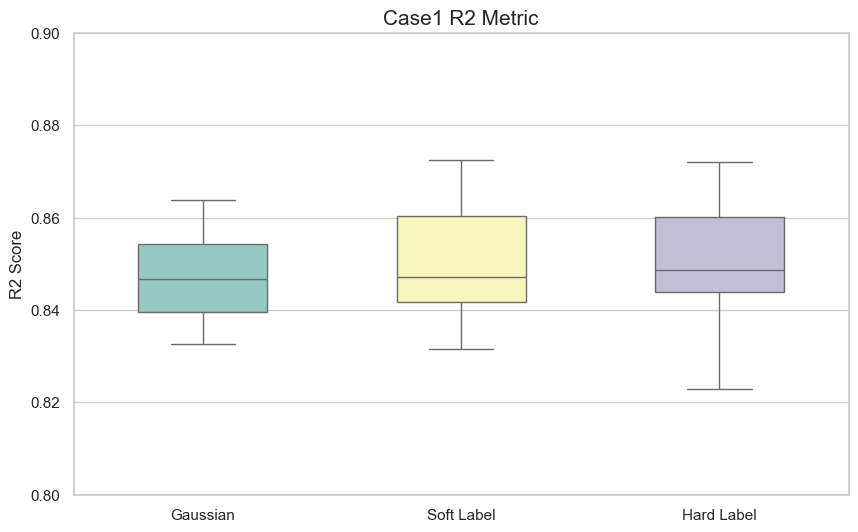

In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# 1. JSON 파일 로드
with open('epoch_1/results_r2.json', 'r') as f:
    data = json.load(f)

# 2. 데이터프레임 변환
df = pd.DataFrame(data).iloc[:,1:]
stats = df.describe()
print(stats.loc[['mean','std']].astype('float32').round(4))

# 3. 통계치 계산 (평균, 표준편차)
# plot_columns = ['R2_BINARY', 'R2_BCE_MSE', 'R2_MSE']
# stats = df[plot_columns].agg(['mean', 'std']).round(4)

print("--- 통계 결과 ---")
# print(stats)
print("----------------")
# 3. 그래프 스타일 설정
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

# 4. Boxplot 그리기
# r2_prob, r2_bin, r2_no 세 컬럼을 한 번에 표현
sns.boxplot(data=df, palette="Set3", width=0.5)
# sns.stripplot(data=df, color=".3", size=4, alpha=0.5) # 실제 데이터 포인트 산점도 추가

# 5. 그래프 제목 및 축 라벨 설정
plt.title('Case1 R2 Metric', fontsize=15)
plt.ylabel('R2 Score', fontsize=12)
# plt.xlabel('Condition Type', fontsize=12)
plt.ylim(0.8, 0.9) # 데이터 범위에 맞춰 Y축 조정

# 6. 결과 출력
plt.show()
# # 4. 시각화
# plt.figure(figsize=(12, 7))
# box = plt.boxplot([df[col] for col in plot_columns], labels=plot_columns, patch_artist=True)

# # 스타일링 (색상)
# colors = ['#add8e6', '#90ee90', '#ffb6c1']
# for patch, color in zip(box['boxes'], colors):
#     patch.set_facecolor(color)

# # 5. 그래프 위에 평균과 표준편차 텍스트 추가
# for i, col in enumerate(plot_columns):
#     mean_val = stats.loc['mean', col]
#     std_val = stats.loc['std', col]
    
#     # 박스플롯 상단에 텍스트 표시 (위치는 데이터의 최댓값 부근으로 조정)
#     plt.text(i + 1, df[col].max() + 0.002, f'Mean: {mean_val}\nStd: {std_val}', 
#              ha='center', va='bottom', fontweight='bold', color='darkblue')

# plt.title('R2 Scores with Mean & Std Dev', fontsize=15)
# plt.ylabel('R2 Score', fontsize=12)
# plt.grid(True, axis='y', linestyle='--', alpha=0.6)

# # 여백 조정 후 출력
# plt.tight_layout()
# plt.show()